In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
# Load and inspect data
df = pd.read_csv('data_responses.csv', encoding='ISO-8859-1')
df.head(1)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [39]:
# Data Cleaning
df = df.query('wave < 6 | wave > 9')

In [101]:
# Experiment 1
df1 = df.loc[:, ['gender', 'age', 'field_cd', 'race', 'imprace', 'imprelig', 'date', 'go_out']]

# Convert race values
race_idx_name = ['Black', 'White', 'Latino', 'Asian', 'Native American', 'Other']
df1['race'].fillna(6.0, inplace=True)
df1['race'] = df1['race'].map(lambda idx: race_idx_name[int(idx) - 1])

# Convert field values
field_idx_name = [
    'Law', 'Math', 'SocSci', 'Medicine', 'Engineering', 'English',
    'History', 'Business', 'Education', 'Science', 'SocWork', 'Undecided',
    'PoliSci', 'Film', 'Arts', 'Language', 'Architecture', 'Other'
]
df1['field_cd'].fillna(18.0, inplace=True)
df1['field_cd'] = df1['field_cd'].map(lambda idx: field_idx_name[int(idx) - 1])

# Separate by gender
gender_idx_name = ['Female', 'Male']
df1_gen = {gender_idx_name[idx]: df1.query('gender == {}'.format(idx)) for idx in range(2)}

df1.head(1)

,gender,age,field_cd,race,imprace,imprelig,date,go_out
0,0,21.0,Law,Asian,2.0,4.0,7.0,1.0


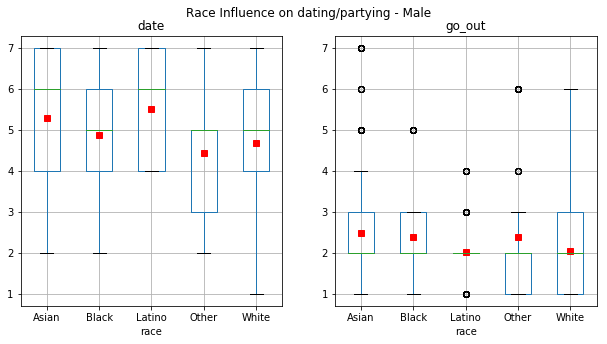

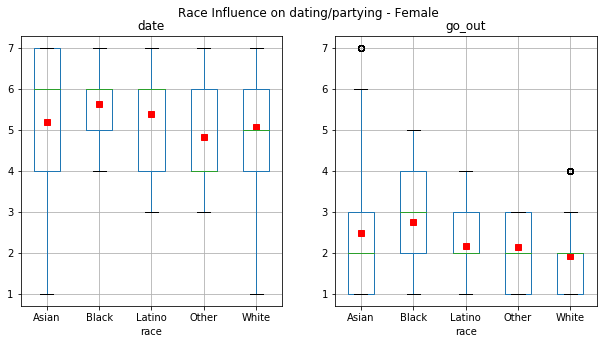

In [102]:
# Examining dating and partying habits by race

# Male
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
for ax, col in zip(axs, ['date', 'go_out']):
    df1_gen['Male'].boxplot(column=col, by='race', ax=ax)
    means_m = list(df1_gen['Male'].groupby('race').agg('mean')[col])
    ax.plot(np.arange(len(means_m)) + 1, means_m, 'rs')
fig.suptitle('Race Influence on dating/partying - Male', fontsize=12)

# Female
fig2, axs2 = plt.subplots(1, 2, figsize=(10, 5))
for ax, col in zip(axs2, ['date', 'go_out']):
    df1_gen['Female'].boxplot(column=col, by='race', ax=ax)
    means_f = list(df1_gen['Female'].groupby('race').agg('mean')[col])
    ax.plot(np.arange(len(means_f)) + 1, means_f, 'rs')
fig2.suptitle('Race Influence on dating/partying - Female', fontsize=12)

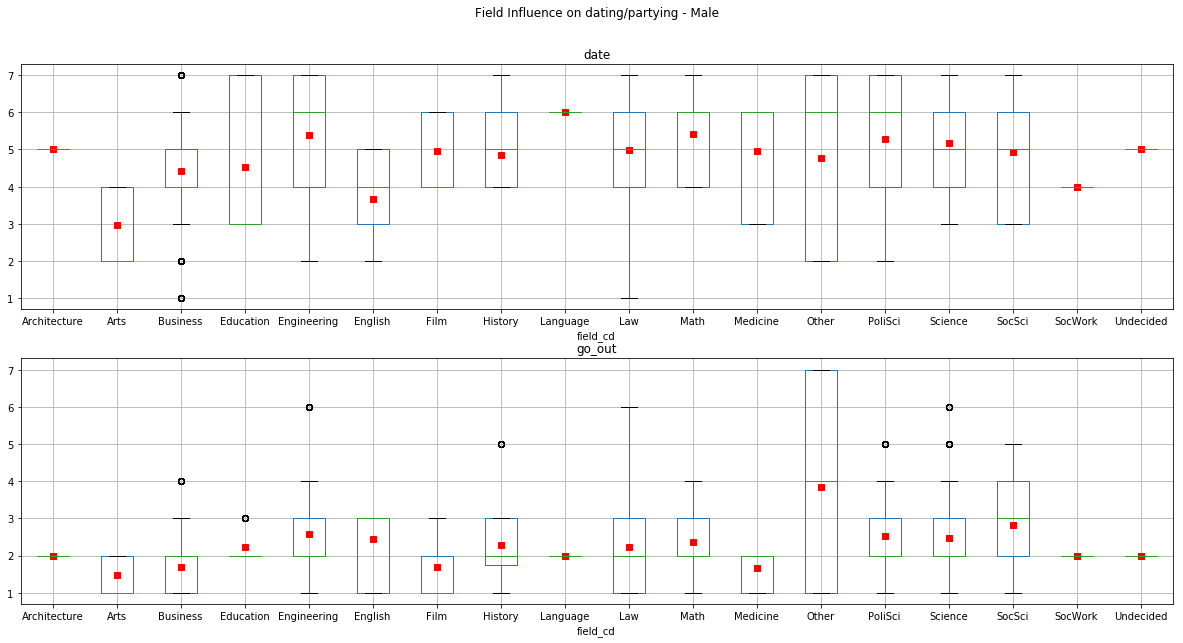

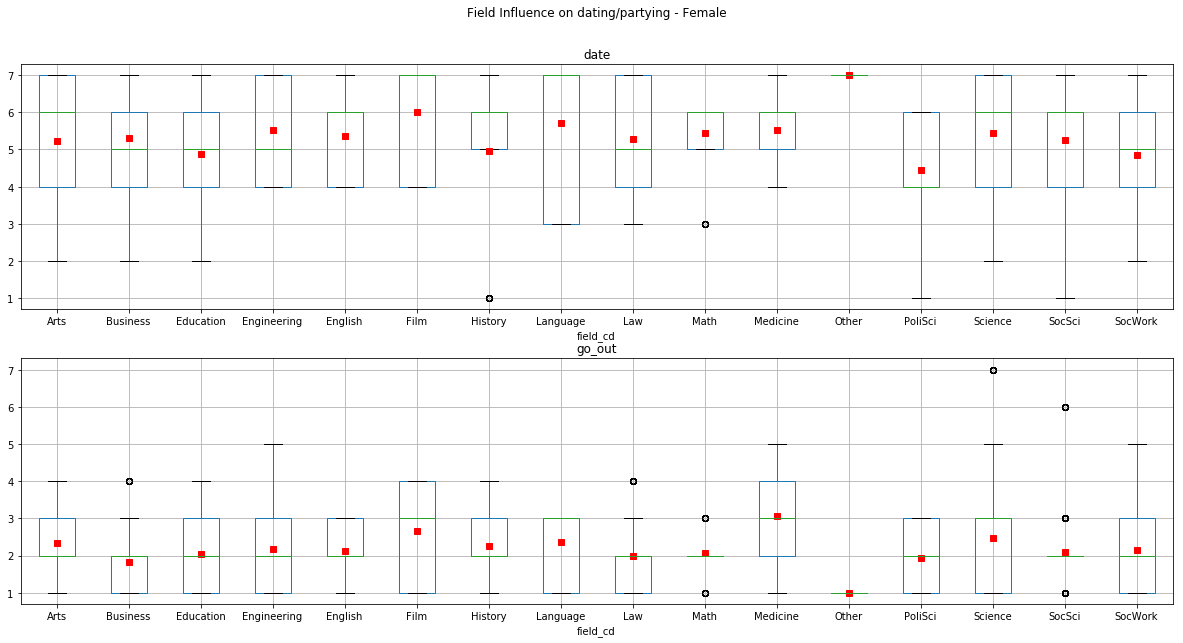

In [103]:
# Examining dating and partying habits by field

# Male
fig, axs = plt.subplots(2, 1, figsize=(20, 10))
for ax, col in zip(axs, ['date', 'go_out']):
    df1_gen['Male'].boxplot(column=col, by='field_cd', ax=ax)
    means_m = list(df1_gen['Male'].groupby('field_cd').agg('mean')[col])
    ax.plot(np.arange(len(means_m)) + 1, means_m, 'rs')
fig.suptitle('Field Influence on dating/partying - Male', fontsize=12)

# Female
fig2, axs2 = plt.subplots(2, 1, figsize=(20, 10))
for ax, col in zip(axs2, ['date', 'go_out']):
    df1_gen['Female'].boxplot(column=col, by='field_cd', ax=ax)
    means_f = list(df1_gen['Female'].groupby('field_cd').agg('mean')[col])
    ax.plot(np.arange(len(means_f)) + 1, means_f, 'rs')
fig2.suptitle('Field Influence on dating/partying - Female', fontsize=12)

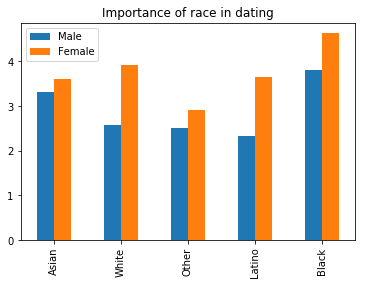

In [155]:
# Examining importance of race in dating based on race and gender

races = list(df1.race.unique())
means_m = list(df1_gen['Male'].groupby('race').agg('mean')['imprace'])
means_f = list(df1_gen['Female'].groupby('race').agg('mean')['imprace'])
means_data = np.squeeze(np.dstack((means_m, means_f)))
df1_imprace = pd.DataFrame(means_data, columns=['Male', 'Female'])
df1_imprace.index = df1_imprace.index.map(lambda x: races[x])
df1_imprace.plot.bar(title='Importance of race in dating')